In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import os
import imageio as io
import cv2
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from skimage import data
from skimage.color import rgb2gray
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
datadir = '/content/drive/MyDrive/ColabNotebooks/flowers'
categories = ['rrose','rtulip', 'rsunflower']

In [4]:
label = []
images = []
flat_data = []
dim = 155

def create_training_data():
    for category in categories:
        class_num = categories.index(category)
        path = os.path.join(datadir,category)
        
        for img in os.listdir(path):
            if img.endswith('.jpg'):
                try:
                    image = io.imread(os.path.join(path,img))
                    img_resized = resize(image,(dim, dim, 3))
                    flat_data.append(img_resized.flatten())
                    label.append(class_num)
                except (IOError, SyntaxError) as e:
                    print('Bad file:', img)

create_training_data()

flat_data = np.array(flat_data)
label = np.array(label)

In [5]:
flat_data

array([[0.5172094 , 0.51328783, 0.53289568, ..., 0.14509804, 0.2       ,
        0.07058824],
       [0.26652751, 0.29822774, 0.33333333, ..., 0.28337761, 0.30489564,
        0.30934729],
       [0.82343494, 0.76510253, 0.25520495, ..., 0.834803  , 0.66043235,
        0.01568627],
       ...,
       [0.37474649, 0.42369142, 0.50786477, ..., 0.13386464, 0.12600763,
        0.17768379],
       [0.75018261, 0.60012854, 0.43916876, ..., 0.55967334, 0.73509008,
        0.48070739],
       [0.5797168 , 0.64063986, 0.65691988, ..., 0.26116076, 0.37463019,
        0.15369713]])

In [6]:
label.shape

(300,)

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
flat_data = pca.fit_transform(flat_data)

flat_data.shape

(300, 300)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, label, test_size=0.20)

# Linear regression 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear = LinearRegression()
linear = linear.fit(x_train, y_train)

y_pred_linear = linear.predict(x_test)

linear_model = linear.score(x_test, y_test)
linear.score(x_test, y_test)

0.44243114116047155

In [10]:
print(metrics.confusion_matrix(y_test,np.asarray(y_pred_linear,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_linear,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_linear,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_linear,dtype="int")))

[[16  0  0]
 [13  4  0]
 [ 1 18  8]]
              precision    recall  f1-score   support

           0      0.533     1.000     0.696        16
           1      0.182     0.235     0.205        17
           2      1.000     0.296     0.457        27

    accuracy                          0.467        60
   macro avg      0.572     0.511     0.453        60
weighted avg      0.644     0.467     0.449        60

r2_score =  0.14599430662871105
accuracy =  0.4666666666666667


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression  

lor = LogisticRegression()  
lor.fit(x_train, y_train)  

y_pred_lor = lor.predict(x_test)  
lor_model = lor.score(x_test, y_test)

lor.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.75

In [12]:
print(metrics.confusion_matrix(y_test,np.asarray(y_pred_lor,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_lor,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_lor,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_lor,dtype="int")))

[[14  2  0]
 [ 9  5  3]
 [ 1  0 26]]
              precision    recall  f1-score   support

           0      0.583     0.875     0.700        16
           1      0.714     0.294     0.417        17
           2      0.897     0.963     0.929        27

    accuracy                          0.750        60
   macro avg      0.731     0.711     0.682        60
weighted avg      0.761     0.750     0.723        60

r2_score =  0.56079707198048
accuracy =  0.75


# SVM

In [13]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)  

svc_model = svc.score(x_test, y_test)

svc.score(x_test, y_test)

0.8166666666666667

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


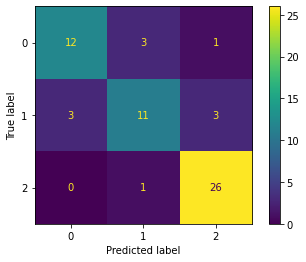

In [14]:
plot_confusion_matrix(svc, x_test, y_test)  
plt.show()

In [15]:
print(metrics.confusion_matrix(y_test,np.asarray(y_pred_svc,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_svc,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_svc,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_svc,dtype="int")))

[[12  3  1]
 [ 3 11  3]
 [ 0  1 26]]
              precision    recall  f1-score   support

           0      0.800     0.750     0.774        16
           1      0.733     0.647     0.688        17
           2      0.867     0.963     0.912        27

    accuracy                          0.817        60
   macro avg      0.800     0.787     0.791        60
weighted avg      0.811     0.817     0.812        60

r2_score =  0.6583977226514843
accuracy =  0.8166666666666667


# Decision Tree classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier  

dtc = DecisionTreeClassifier(criterion = 'entropy')  
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)

dtc_model = dtc.score(x_test, y_test)

dtc.score(x_test, y_test)

0.6666666666666666

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


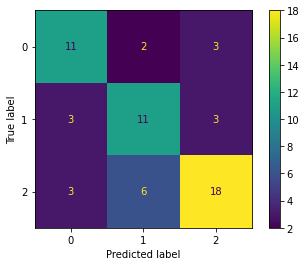

In [17]:
plot_confusion_matrix(dtc, x_test, y_test)  
plt.show()

In [18]:
print(metrics.confusion_matrix(y_test,np.asarray(y_pred_dtc,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_dtc,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_dtc,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_dtc,dtype="int")))

[[11  2  3]
 [ 3 11  3]
 [ 3  6 18]]
              precision    recall  f1-score   support

           0      0.647     0.688     0.667        16
           1      0.579     0.647     0.611        17
           2      0.750     0.667     0.706        27

    accuracy                          0.667        60
   macro avg      0.659     0.667     0.661        60
weighted avg      0.674     0.667     0.669        60

r2_score =  0.07279381862545764
accuracy =  0.6666666666666666


# Random forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier  

rfc = RandomForestClassifier(n_estimators= 1000, criterion="entropy")  
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test) 
rfc_model = rfc.score(x_test, y_test)

rfc.score(x_test, y_test)

0.6833333333333333

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


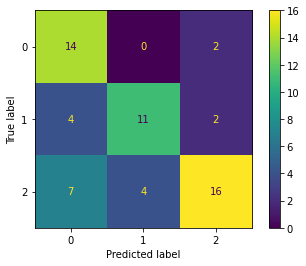

In [20]:
plot_confusion_matrix(rfc, x_test, y_test)  
plt.show()

In [21]:
print(metrics.confusion_matrix(y_test,np.asarray(y_pred_rfc,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_rfc,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_rfc,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_rfc,dtype="int")))

[[14  0  2]
 [ 4 11  2]
 [ 7  4 16]]
              precision    recall  f1-score   support

           0      0.560     0.875     0.683        16
           1      0.733     0.647     0.688        17
           2      0.800     0.593     0.681        27

    accuracy                          0.683        60
   macro avg      0.698     0.705     0.684        60
weighted avg      0.717     0.683     0.683        60

r2_score =  -0.12240748271655133
accuracy =  0.6833333333333333


# Lasso 

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)

y_pred_lasso = lasso.predict(x_test)

# np.sqrt(mean_squared_error(y_pred_lasso, y_test))

lasso_model = lasso.score(x_test, y_test)

lasso.score(x_test, y_test)

0.37831870723675165

In [23]:
print(metrics.confusion_matrix(y_test,np.asarray(y_pred_lasso,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_lasso,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_lasso,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_lasso,dtype="int")))

[[ 0  0  0  0]
 [ 0 14  2  0]
 [ 1  9  6  1]
 [ 0  2 16  9]]
              precision    recall  f1-score   support

          -1      0.000     0.000     0.000         0
           0      0.560     0.875     0.683        16
           1      0.250     0.353     0.293        17
           2      0.900     0.333     0.486        27

    accuracy                          0.483        60
   macro avg      0.427     0.390     0.366        60
weighted avg      0.625     0.483     0.484        60

r2_score =  0.02399349328995548
accuracy =  0.48333333333333334


# Ridge 

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.5, normalize = False, tol = 0.01, solver ='auto')
ridge.fit(x_train, y_train)
  
y_pred_ridge = ridge.predict(x_test)

ridge_model = ridge.score(x_test, y_test)

ridge.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


0.44265913911624577

In [25]:
print(metrics.confusion_matrix(y_test,np.asarray(y_pred_ridge,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_ridge,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_ridge,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_ridge,dtype="int")))

[[16  0  0]
 [13  4  0]
 [ 1 18  8]]
              precision    recall  f1-score   support

           0      0.533     1.000     0.696        16
           1      0.182     0.235     0.205        17
           2      1.000     0.296     0.457        27

    accuracy                          0.467        60
   macro avg      0.572     0.511     0.453        60
weighted avg      0.644     0.467     0.449        60

r2_score =  0.14599430662871105
accuracy =  0.4666666666666667


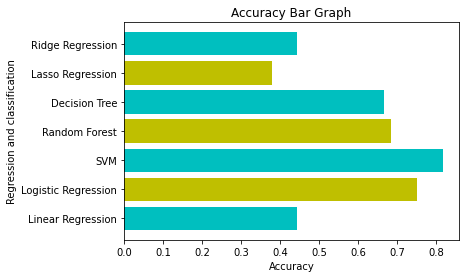

In [26]:
x = ['Linear Regression','Logistic Regression','SVM','Random Forest','Decision Tree',
     'Lasso Regression','Ridge Regression']
y = [linear_model, lor_model, svc_model, rfc_model, dtc_model, lasso_model, ridge_model]
plt.barh(x,y,color=['c','y'])
plt.xlabel('Accuracy')
plt.ylabel('Regression and classification')
plt.title('Accuracy Bar Graph')

plt.show()